# HMM

In [54]:
from hmmlearn import hmm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Define a function to train and plot an HMM

In [55]:
def train_and_plot_single(
    visible_sequence_train,
    visible_sequence_test, 
    n_components : int = 2, 
    ) -> np.array:
    
    # create and train an HMM model
    model = hmm.GaussianHMM(n_components=n_components)
    model.fit(visible_sequence_train)

    # predict the most likely sequence of internal hidden state
    prob, hidden_sequence = model.decode(visible_sequence_test, algorithm='viterbi')

    # transform the numpy matrix into a 1-D list
    visible_sequence_test = [i[0] for i in visible_sequence_test]

    colors_map = {0: "red", 1: "green", 2: "blue", 3: "yellow", 4: "orange", 5: "purple", 6: "pink", 7: "brown", 8: "gray", 9: "olive", 10: "cyan"}

    # map the hidden states to colors
    colors_sequence = [colors_map[i] for i in hidden_sequence]

    plt.subplots(figsize=(21, 9))
    # set the x axis label
    plt.xlabel('Samplings (10min intervals)')
    # set the y axis label
    plt.ylabel('Value')
    # set the title
    plt.title(f'HMM Model with {n_components} hidden states')

    plt.bar(
        x = [i for i in range(len(visible_sequence_test))],
        height = visible_sequence_test,
        color = colors_sequence
    )

    plt.show()

    return hidden_sequence


## Train and test split

In [85]:
# get the column "Appliance" and "light" from the dataset

df = pd.read_csv("energydata_complete.csv", usecols=["Appliances", "lights"])

# trasfrorm the Appliances column into a numpy matrix
x_app = df["Appliances"].to_numpy().reshape(-1, 1)
x_light = df["lights"].to_numpy().reshape(-1, 1)

# split the x arrays in weeks, there are 19 weeks in the dataset
x_app = np.array_split(x_app, len(x_app) / 1008)
x_light = np.array_split(x_light, len(x_light) / 1008)

# the test set will the 4 middle weeks
test_set_app = x_app[6:10]
test_set_light = x_light[6:10]

# the train set will be the first 7 weeks and the last 7 weeks
train_set_app = x_app[:6] + x_app[10:]
train_set_light = x_light[:6] + x_light[10:]

# merge the weeks in a single array
train_set_app = np.concatenate(train_set_app)
test_set_app = np.concatenate(test_set_app)
train_set_light = np.concatenate(train_set_light)
test_set_light = np.concatenate(test_set_light)


## Appliances dataset

### Example with two states

Since the values are sampled every 10 minutes, one day is represented by 144 points, one week by 1008 points and one month by 4320 points.
We are going to plot the results for a period of 1 month

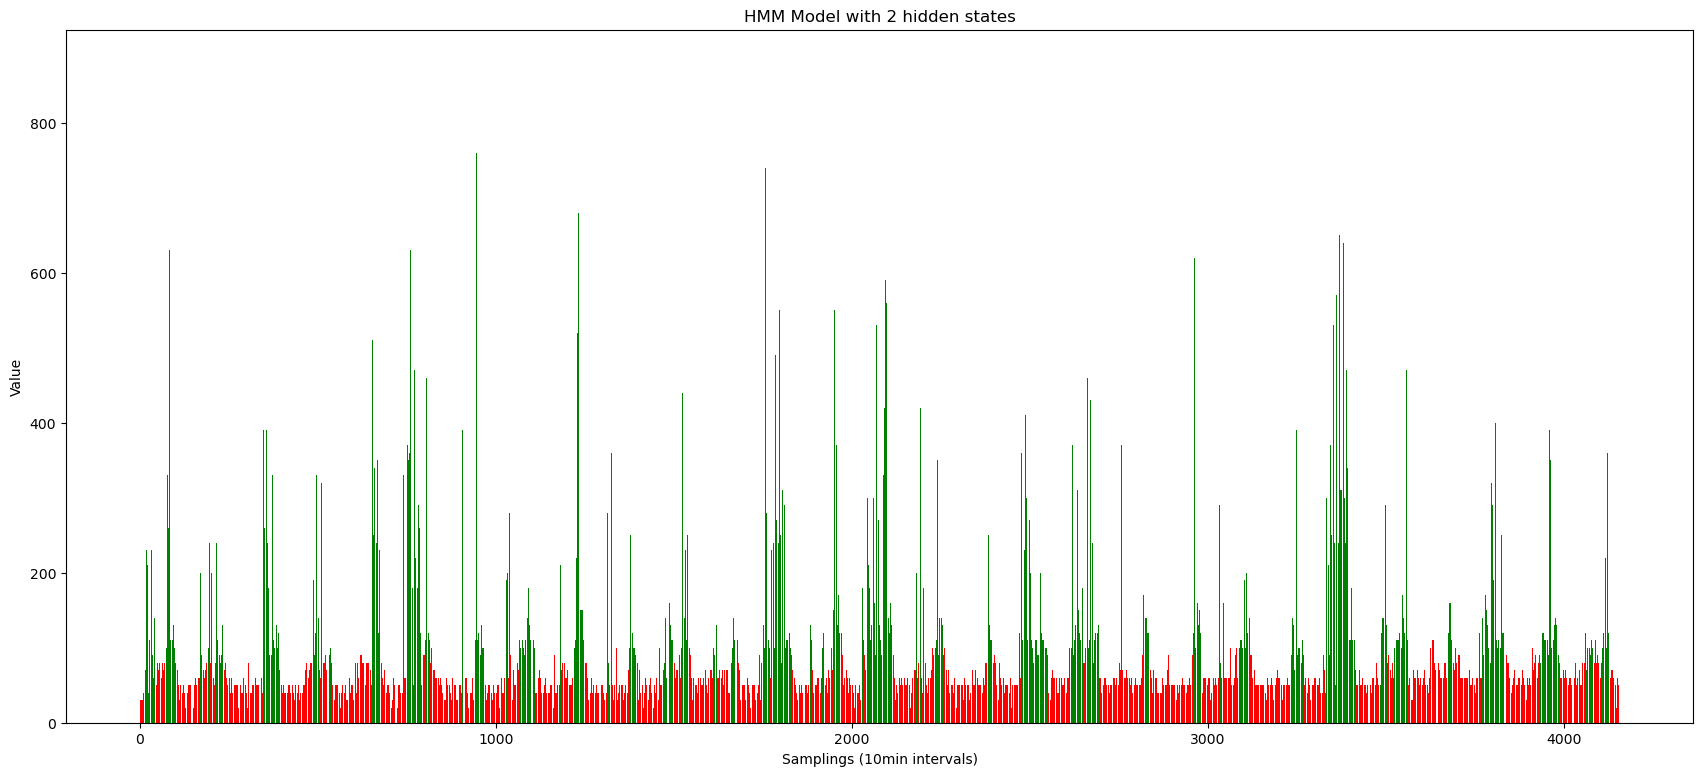

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
train_and_plot_single(
    visible_sequence_train=train_set_app, 
    visible_sequence_test=test_set_app,
    n_components=2
)

### Example with 3-5 states

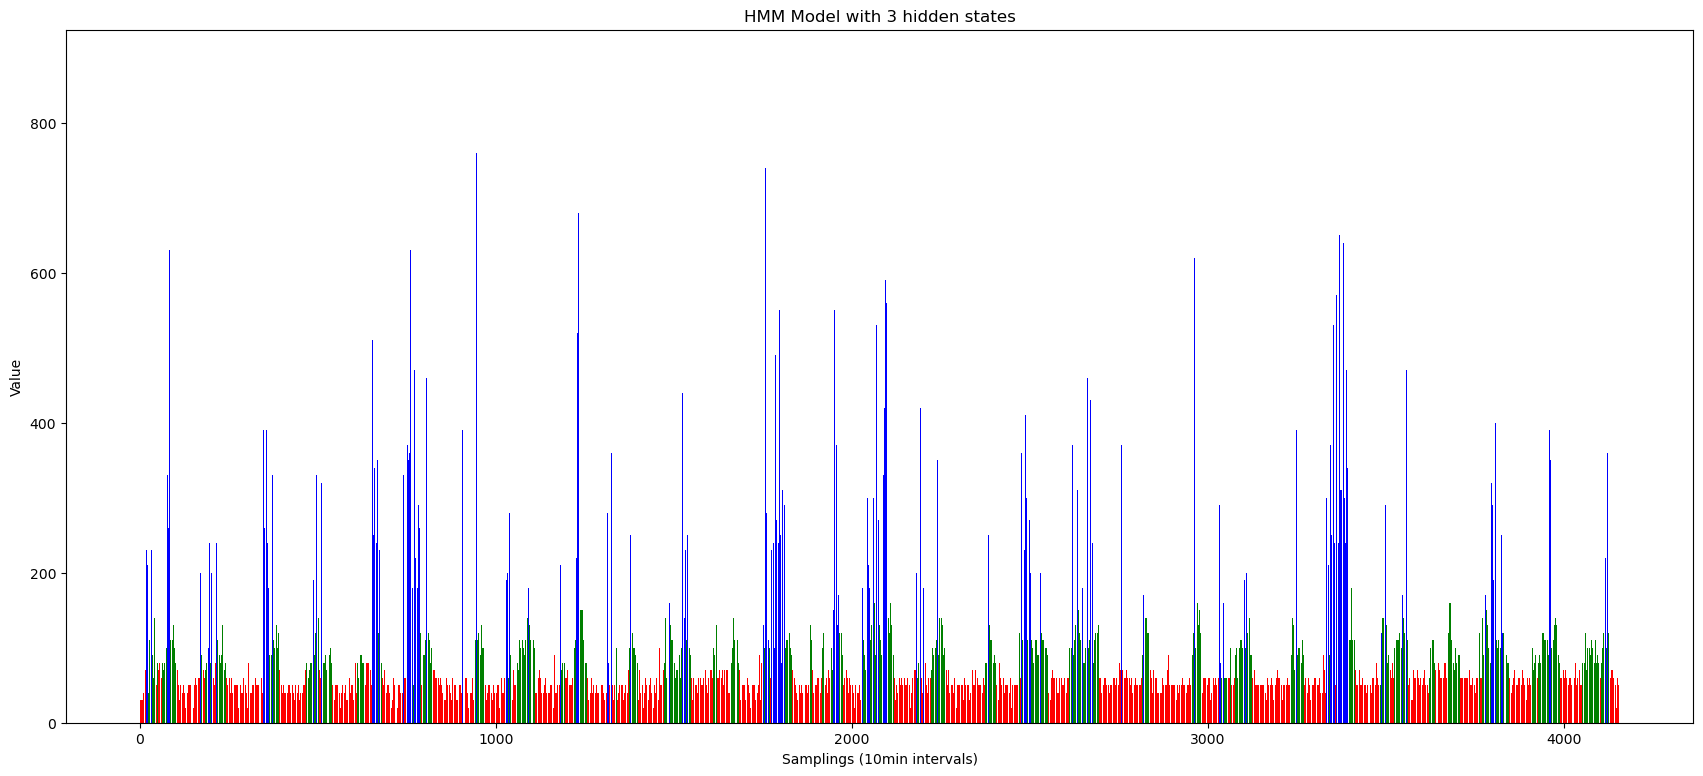

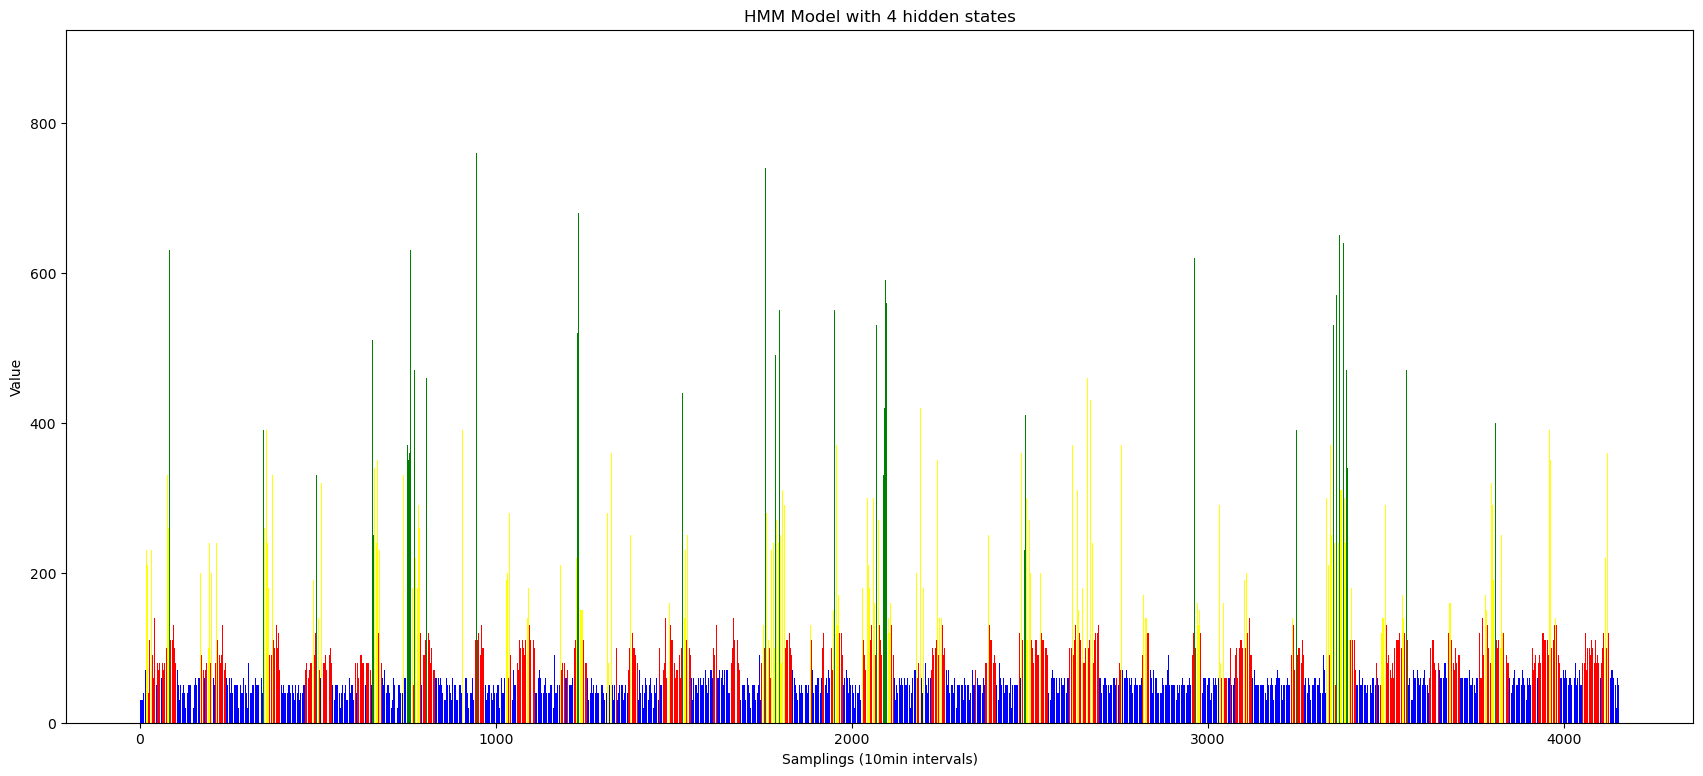

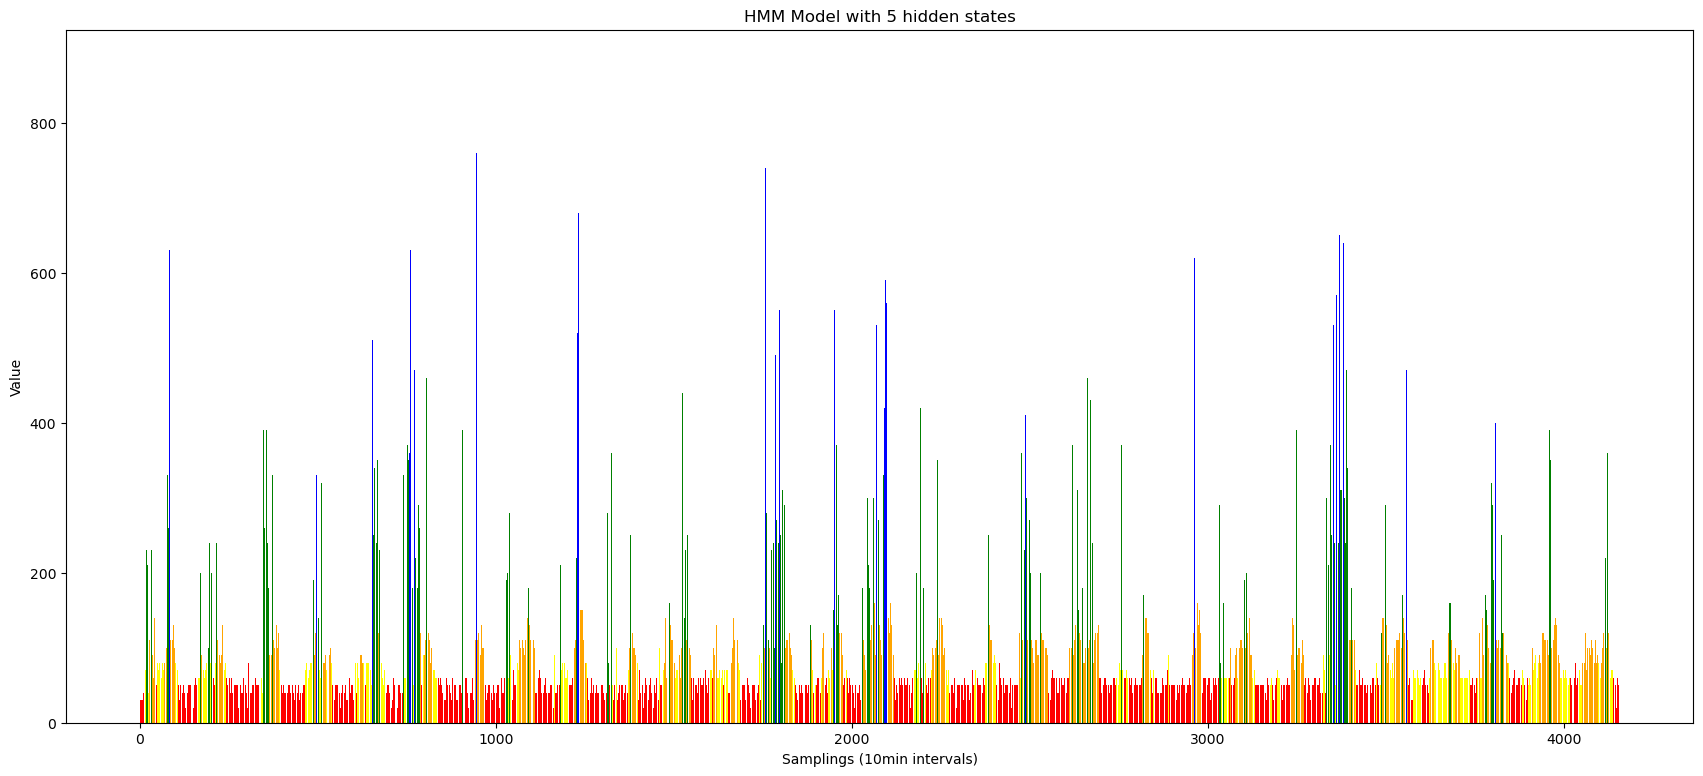

In [58]:
for i in range(3, 6):
    train_and_plot_single(
    visible_sequence_train=train_set_app, 
    visible_sequence_test=test_set_app,
    n_components=i
)

# Lights dataset

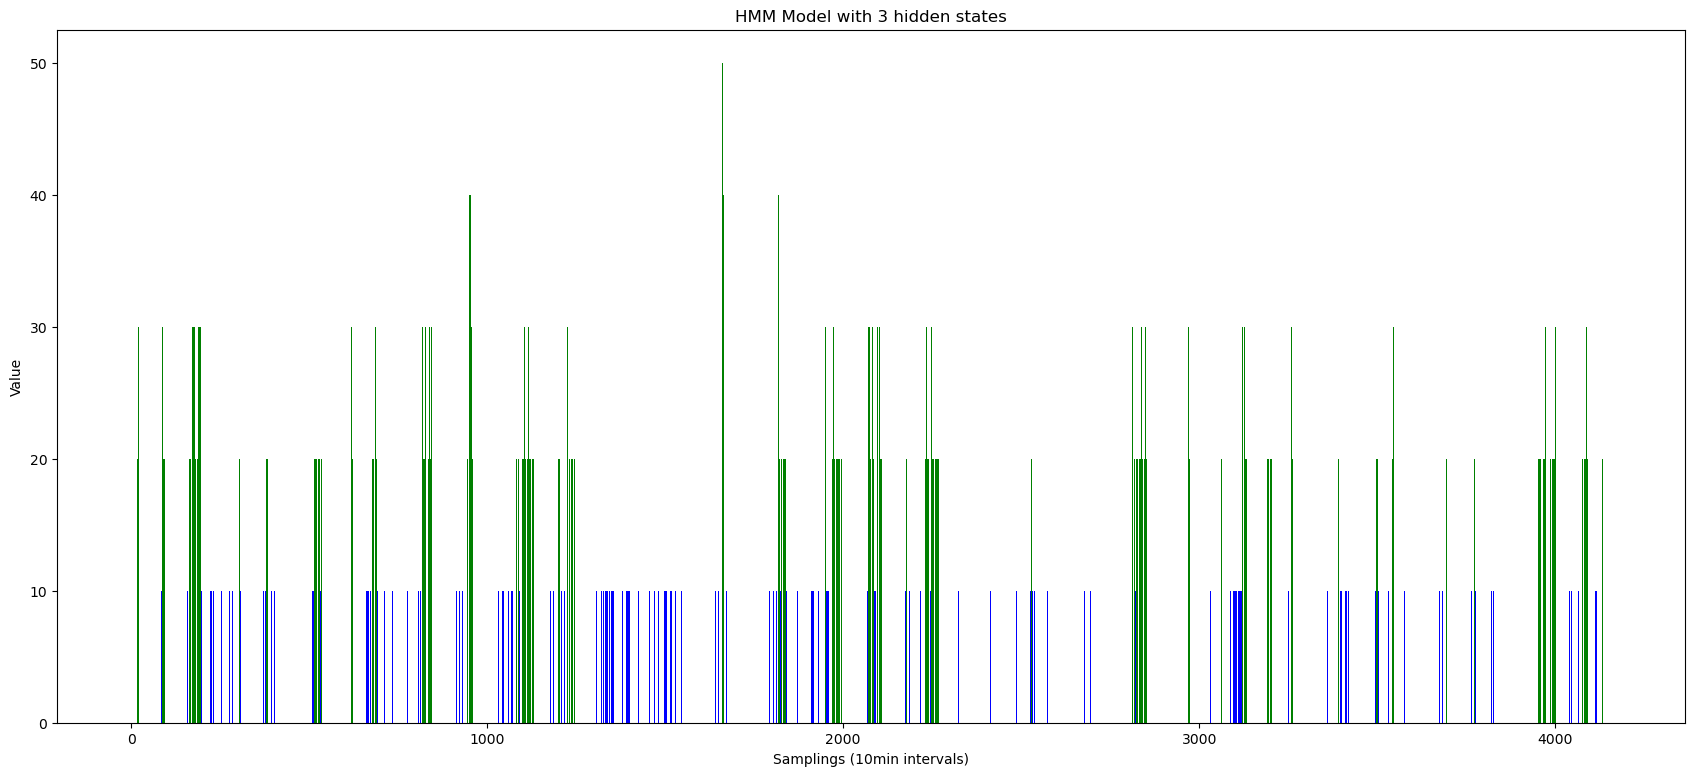

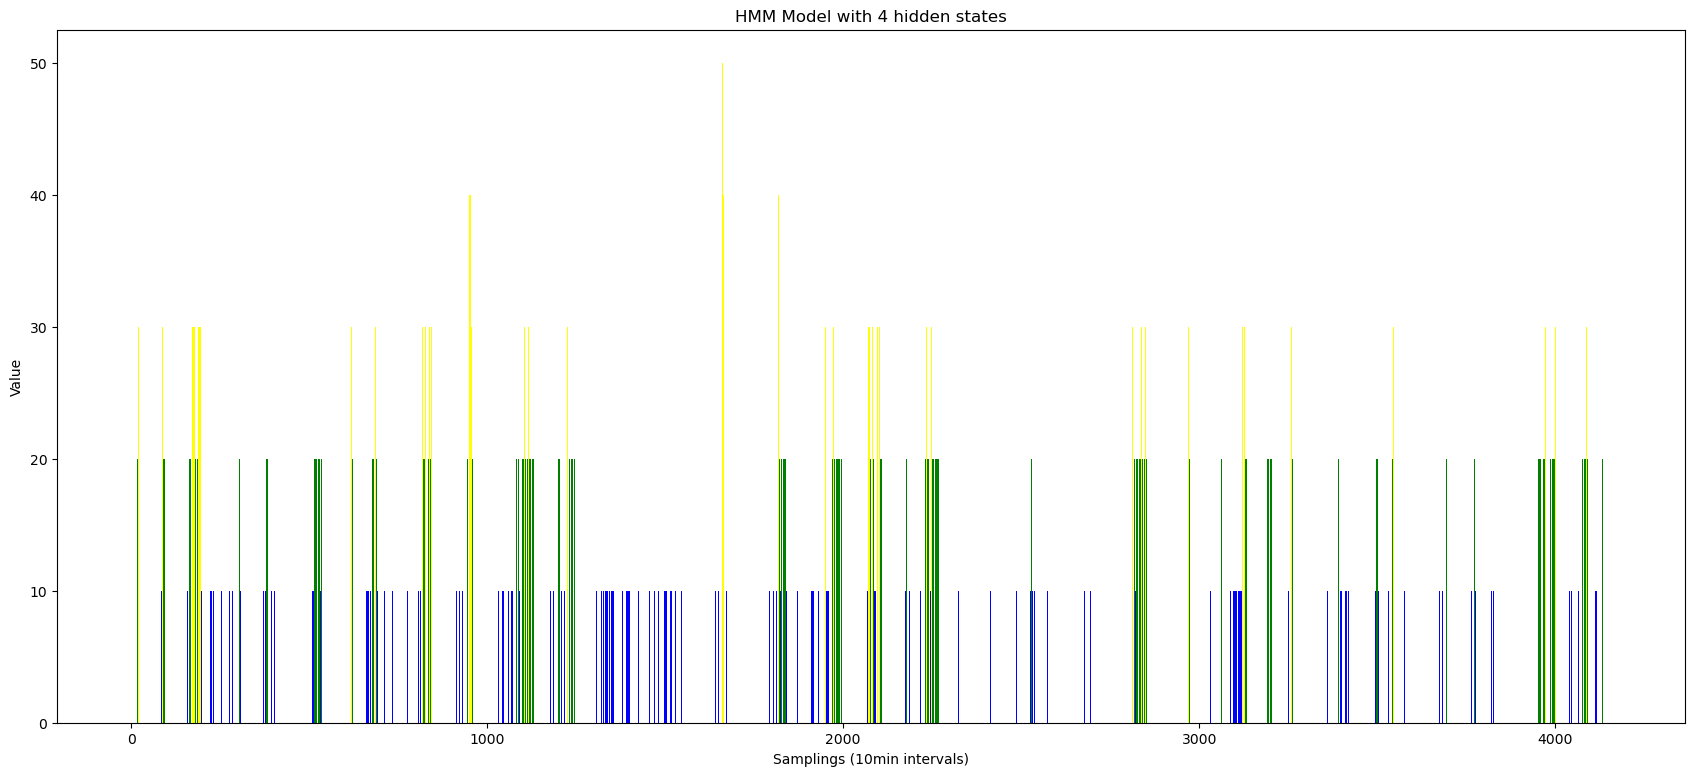

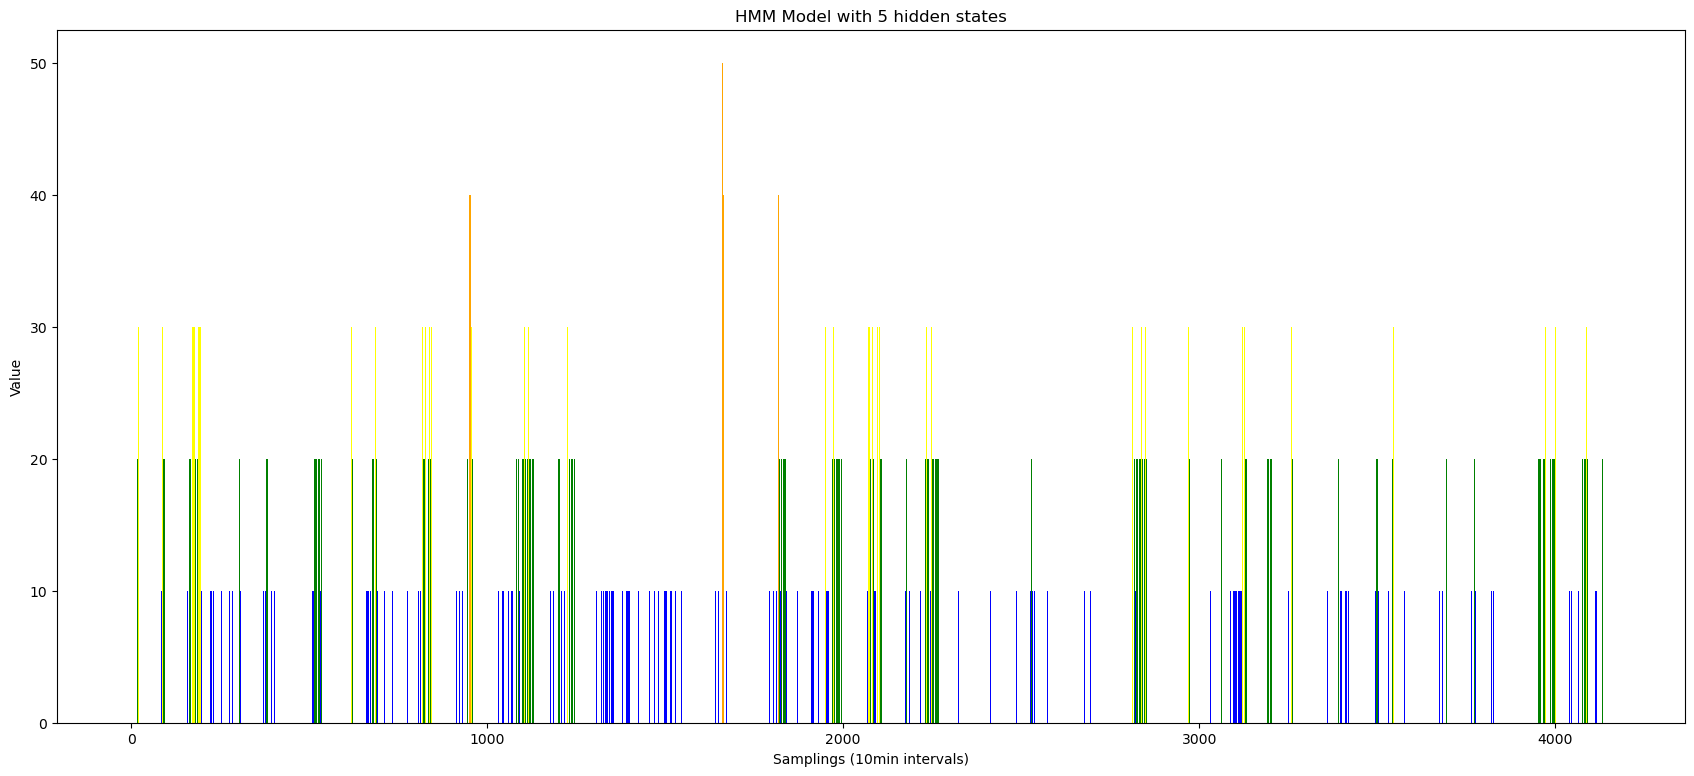

In [59]:
for i in range(3, 6):
    train_and_plot_single(
    visible_sequence_train=train_set_light, 
    visible_sequence_test=test_set_light,
    n_components=i
)

## Model performance

Since the "light" dataset is discrete and there are only 8 different values in the test set, we can try to fit a model with 8 hidden state and see if it is able to perfectly fit the data.

In [86]:
print(np.unique(test_set_light))
print(np.unique(train_set_light))

[ 0 10 20 30 40 50]
[ 0 10 20 30 40 50 60 70]


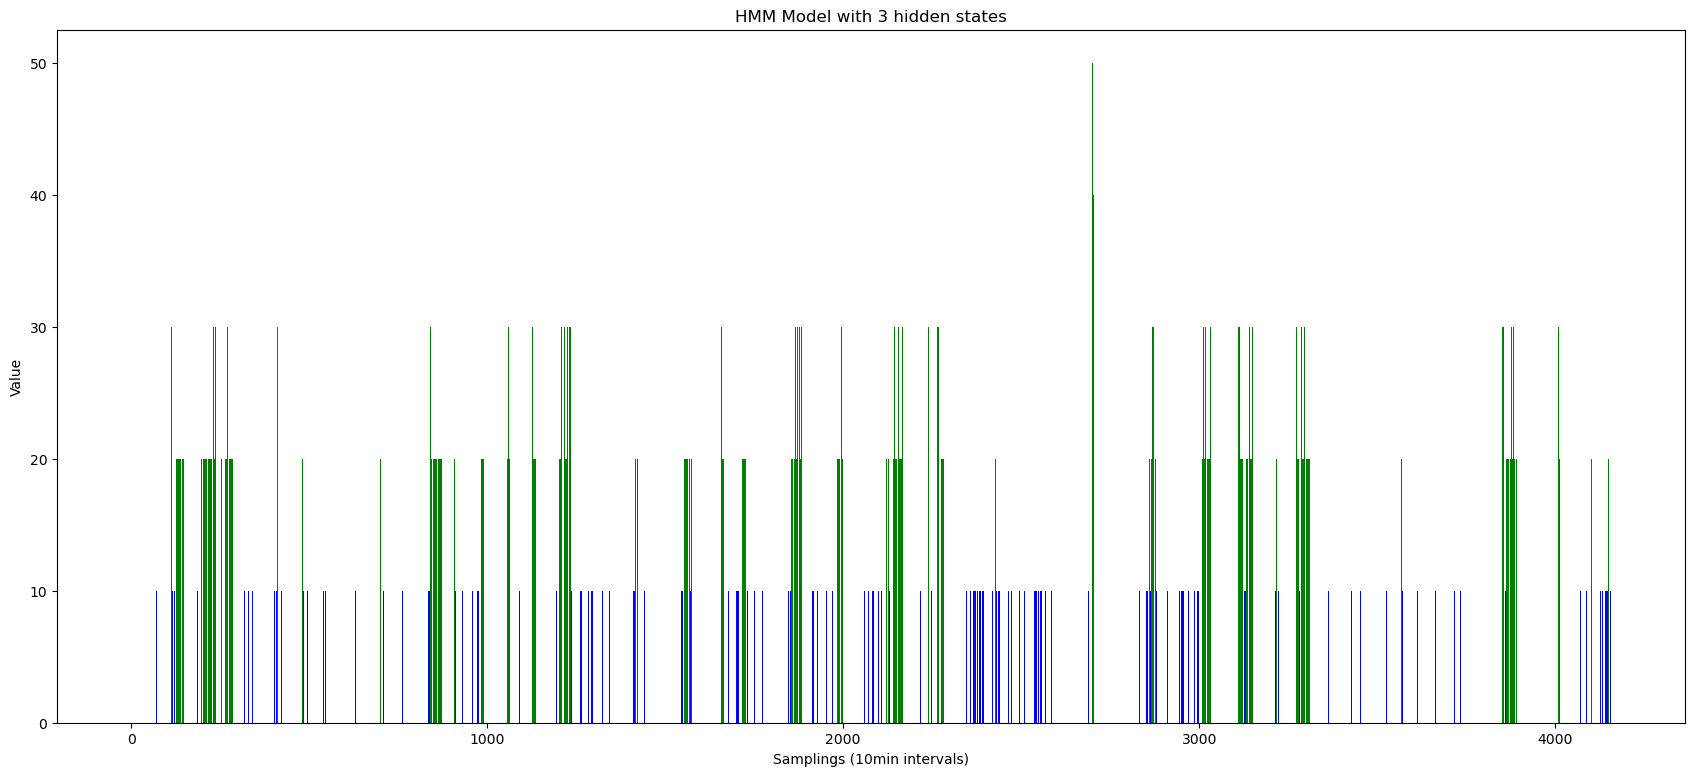

In [107]:
# find the unique values in light dataset
hidden_sequence = train_and_plot_single(
    visible_sequence_train=train_set_light, 
    visible_sequence_test=test_set_light,
    n_components=3
)

In [110]:
# count the number of times each value appears in the hidden sequence
vals_h, counts_h = np.unique(hidden_sequence, return_counts=True)

# count the number of times each value appears in the test set
vals_t , counts_t = np.unique(test_set_light, return_counts=True)

print(list(zip(vals_h, counts_h)))
print(list(zip(vals_t, counts_t)))


[(0, 3123), (1, 564), (2, 469)]
[(0, 3124), (10, 469), (20, 395), (30, 157), (40, 9), (50, 2)]


The number of values for each different state in the visible sequence is really similar to the reconstructed sequence (hidden states).